In [1]:
import os

import matplotlib.pyplot as plt

import convert
import main
import network
from lammps_scripts import ElasticScript
from main import (
    CalculationResult,
    CalculationSetup,
    ElasticData,
    StepResult,
    get_elastic_data_from_file,
    print_history,
    run_iteration,
    run_lammps,
)

In [5]:
def plot_opt_history(log_dir: str, log_file:str = "optimization_log.pkl"):
    opt_history = main.load_optimization_log(os.path.join(log_dir, log_file))
    Bs = [step.dG.bulk_modulus for step in opt_history]
    Gs = [step.dG.shear_modulus for step in opt_history]
    Ps = [step.dG.p_ratio for step in opt_history]
    Zs = [step.network.coordination_number for step in opt_history]
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
    axs[0].plot(Zs, Ps, label='P')
    axs[0].set_ylabel("Poisson's ratio")
    axs[0].set_xlabel("Z")
    axs[0].legend()
    # axs[0].set_ylim(-0.2, 0.6)
    # P ratio graph
    # steps = [i+1 for i in range(len(opt_history))]
    # axs[1].plot(steps, Ps, label='P')
    # axs[1].set_xlabel("Step")
    # axs[1].legend()
    # Moduli graph
    axs[1].plot(Zs, Bs, label='B')
    axs[1].plot(Zs, Gs, label='G')
    axs[1].set_ylabel("Moduli")
    axs[1].set_xlabel("Z")
    axs[1].legend()
    plt.show()

    return opt_history


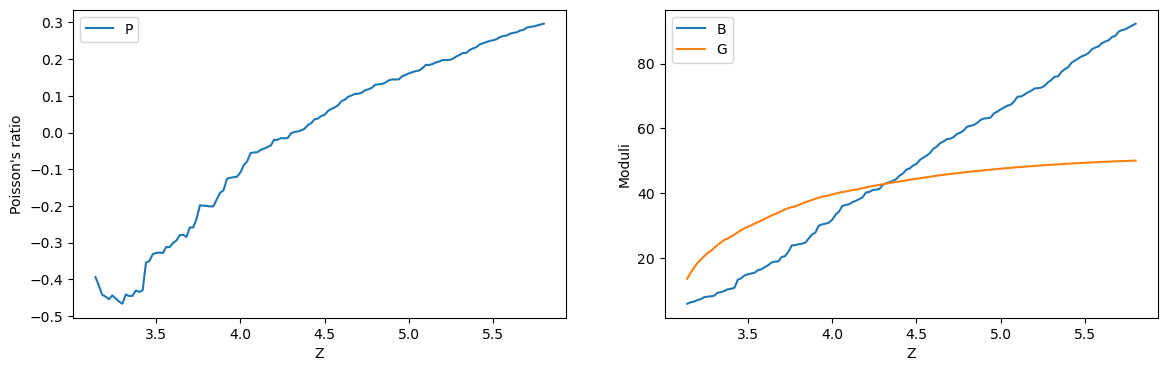

In [7]:
# orig_history = plot_opt_history("/home/sergey/work/auxetic_optimizer/successful_cases/", log_file="small_auxetic_0.01.pkl")
new_history = plot_opt_history("/home/sergey/work/auxetic_optimizer/0")


In [8]:
networks_lowP = []
for d in os.listdir("networks_lowP"):
    for sd in os.listdir(os.path.join("networks_lowP", d)):
        networks_lowP.append(
            network.Network.from_data_file(
                os.path.join("networks_lowP", d, sd, "original_network.lmp"),
                include_angles=True,
                include_dihedrals=False,
            )
        )

initial_ps = []
for d in os.listdir("networks_lowP"):
    for sd in os.listdir(os.path.join("networks_lowP", d)):
        initial_ps.append(
            main.load_optimization_log(os.path.join("networks_lowP", d, sd, "optimization_log.pkl"))[0].dG.p_ratio
        )

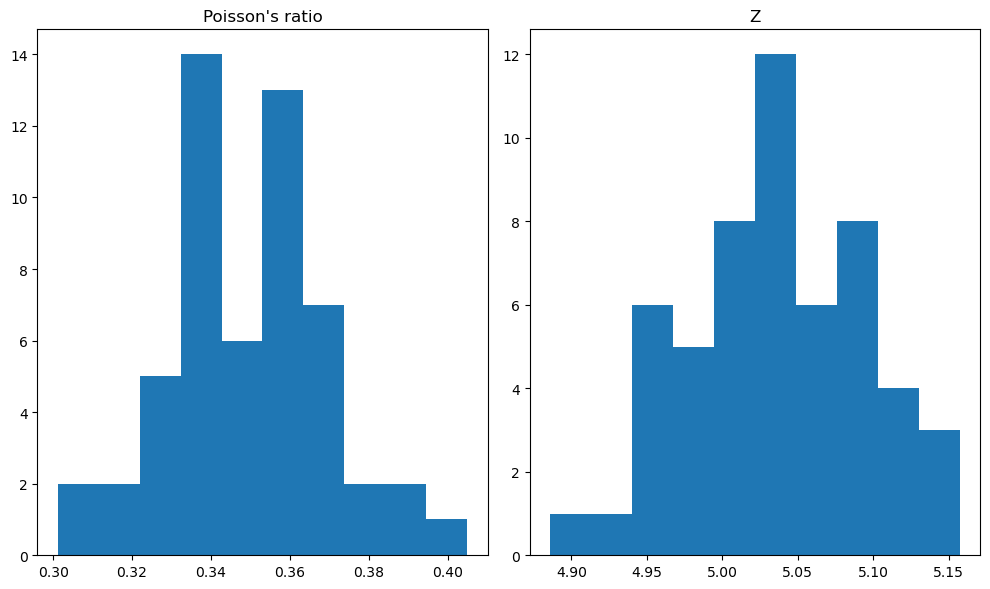

In [9]:
zs = [networks.coordination_number for networks in networks_lowP]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), layout='tight')
ax[0].hist(initial_ps)
ax[0].set_title('Poisson\'s ratio')
ax[1].hist(zs)
ax[1].set_title('Z')
plt.show()
